# Mini Project 1: Setting up a custom ANN

This whole mini project, which aims to answer some big questions about how we can control the state of ANNs, is predicated on the assumption that the python libraries that I have access to will allow me to customise the weights of the ANN. Typically, the weights are initialised randomly, but this decision is somewhat arbitrary and seems to be used due to the abstract nature of the process. However, in some situations, such as edge detection, we have a good intuition on what the weights should look like, which is described in detail in the PDF report surrounding this project. Luckily, I found that Keras layers do have methods to set the weights, which means we should be able to use that to use our custom weights generated from our MS Paint generated image files.

In [1]:
# Testing some basic weight reading for some dummy data,
# following a similar method from the website
# https://www.codespeedy.com/get_weights-and-set_weights-functions-in-keras-layers/
import tensorflow as tf
import keras
from keras import Input, Model
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Creating a dummy neural network. The specific
# activations, loss and optimizer do not matter
# here as we are just trying to see how we can
# access the weights. This dummy network would
# be suitable for regression problems, according
# to the source.
# In this case, we have an input layer of 1 node,
# a hidden layer of 4 nodes, and a single output layer of 1.
input_layer = Input(shape = (1,), name = 'input_layer')
hidden_layer_1 = Dense(units = 4, activation = 'linear', name = 'hidden_layer_1')(input_layer)
output_layer = Dense(units = 1, activation = 'linear', name = 'output_layer')(hidden_layer_1)
model = Model(inputs = input_layer, outputs = output_layer)
model.compile(optimizer = 'sgd', loss = 'mse', metrics = ['mse'])

# We can use the model.layers attribute
# in order to access the layers we have created.
for layer in model.layers:
    print(layer.name, layer.get_weights())

input_layer []
hidden_layer_1 [array([[ 0.5226927 , -1.0326635 ,  0.68899286,  1.0258915 ]],
      dtype=float32), array([0., 0., 0., 0.], dtype=float32)]
output_layer [array([[-0.5820866 ],
       [-0.71835804],
       [-0.4654354 ],
       [ 0.9638543 ]], dtype=float32), array([0.], dtype=float32)]


From the Keras documentation (https://keras.io/api/layers/), the result of a get_weights() call is two numpy arrays. The first are the weights linking in to the nodes in the layer, and the second are the biases. When using set_weights(), the weights must be of a similar format. When we printed out the results for the input_layer, we can see that there are no weights or biases due to it being an input layer. The course I am doing to help with my python skills wrt ANNs is not treating the input layers as input layers, but rather is treating them like another hidden layer. This creates an implicit input layer that is not actually the input layer. The method I have found above treats the input layer like an input layer correctly. I will also investigate other methods to do this within the Sequential() class.

Let us test this ANN on some trivial data, both with set_weights() usage and without.

In [2]:
X = np.random.randn(100)
y = 3*X + np.random.randn(100)*0.4

model.fit(X,y,batch_size = 1, epochs = 25)

Epoch 1/25
100/100 [==============================] - 3s 1ms/step - loss: 0.3529 - mse: 0.3529
Epoch 2/25
100/100 [==============================] - 0s 1ms/step - loss: 0.1417 - mse: 0.1417
Epoch 3/25
100/100 [==============================] - 0s 2ms/step - loss: 0.1519 - mse: 0.1519
Epoch 4/25
100/100 [==============================] - 0s 2ms/step - loss: 0.1445 - mse: 0.1445
Epoch 5/25
100/100 [==============================] - 0s 2ms/step - loss: 0.1593 - mse: 0.1593
Epoch 6/25
100/100 [==============================] - 0s 2ms/step - loss: 0.1456 - mse: 0.1456
Epoch 7/25
100/100 [==============================] - 0s 2ms/step - loss: 0.1448 - mse: 0.1448
Epoch 8/25
100/100 [==============================] - 0s 2ms/step - loss: 0.1356 - mse: 0.1356
Epoch 9/25
100/100 [==============================] - 0s 2ms/step - loss: 0.1511 - mse: 0.1511
Epoch 10/25
100/100 [==============================] - 0s 2ms/step - loss: 0.1450 - mse: 0.1450
Epoch 11/25
100/100 [============================

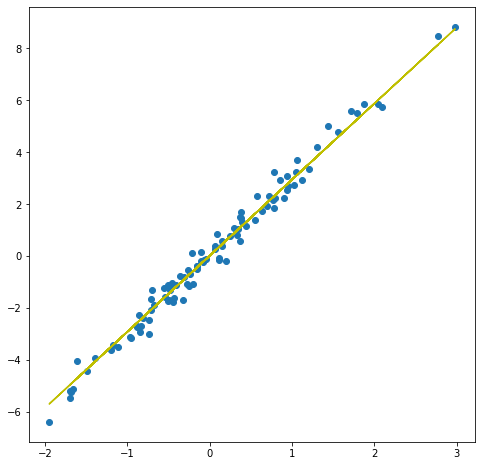

In [3]:
# Showing the predictions.
plt.figure(figsize = (8,8))
y_pred = model.predict(X)
plt.plot(X,y,'o',X,y_pred,'y')

As we can see, the model fits well! Now we will setup the network again, and set the weights to the weights after this fitting. This is obviously not what we would do in practice, we would just run fit() again if we wanted to keep using the same weights. Our goal here is to take this simple example and practice using the set_weights() method.

In [4]:
# Getting the weights after the fit so
# we can practice using set_weights().
weights_to_set = {}
for layer in model.layers:
    print(layer.name, layer.get_weights())
    weights_to_set[layer.name] = layer.get_weights()

input_layer = Input(shape = (1,), name = 'input_layer')
hidden_layer_1 = Dense(units = 4, activation = 'linear', name = 'hidden_layer_1')(input_layer)
output_layer = Dense(units = 1, activation = 'linear', name = 'output_layer')(hidden_layer_1)
model_2 = Model(inputs = input_layer, outputs = output_layer)
model_2.compile(optimizer = 'sgd', loss = 'mse', metrics = ['mse'])

print('\n')
for layer in model_2.layers:
    layer.set_weights(weights_to_set[layer.name])
    print(layer.name, layer.get_weights())


input_layer []
hidden_layer_1 [array([[ 0.2942061, -1.3058017,  0.5048678,  1.3942683]], dtype=float32), array([ 0.0163159 , -0.01749915,  0.01912631,  0.01541089], dtype=float32)]
output_layer [array([[-0.34636325],
       [-1.04142   ],
       [-0.17775987],
       [ 1.2656941 ]], dtype=float32), array([-0.01216106], dtype=float32)]


input_layer []
hidden_layer_1 [array([[ 0.2942061, -1.3058017,  0.5048678,  1.3942683]], dtype=float32), array([ 0.0163159 , -0.01749915,  0.01912631,  0.01541089], dtype=float32)]
output_layer [array([[-0.34636325],
       [-1.04142   ],
       [-0.17775987],
       [ 1.2656941 ]], dtype=float32), array([-0.01216106], dtype=float32)]


In [5]:
model_2.fit(X,y,batch_size = 1, epochs = 25)

Epoch 1/25
100/100 [==============================] - 1s 1ms/step - loss: 0.1413 - mse: 0.1413
Epoch 2/25
100/100 [==============================] - 0s 1ms/step - loss: 0.1491 - mse: 0.1491
Epoch 3/25
100/100 [==============================] - 0s 1ms/step - loss: 0.1503 - mse: 0.1503
Epoch 4/25
100/100 [==============================] - 0s 1ms/step - loss: 0.1398 - mse: 0.1398
Epoch 5/25
100/100 [==============================] - 0s 1ms/step - loss: 0.1441 - mse: 0.1441
Epoch 6/25
100/100 [==============================] - 0s 1ms/step - loss: 0.1480 - mse: 0.1480
Epoch 7/25
100/100 [==============================] - ETA: 0s - loss: 0.1297 - mse: 0.129 - 0s 1ms/step - loss: 0.1417 - mse: 0.1417
Epoch 8/25
100/100 [==============================] - 0s 1ms/step - loss: 0.1416 - mse: 0.1416
Epoch 9/25
100/100 [==============================] - 0s 1ms/step - loss: 0.1429 - mse: 0.1429
Epoch 10/25
100/100 [==============================] - 0s 1ms/step - loss: 0.1405 - mse: 0.1405  
Epoch 11/

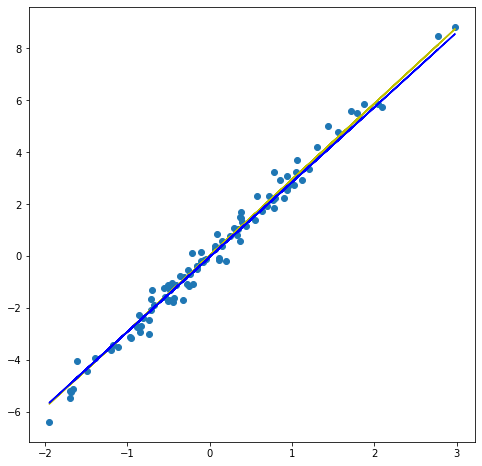

In [6]:
# Showing the predictions.
plt.figure(figsize = (8,8))
y_pred2 = model_2.predict(X)
plt.plot(X,y,'o',X,y_pred,'y', X,y_pred2,'b')

So far so good, we have produced a new line in blue, and the loss remains low as expected. The way I have constructed the models is different to the python course I am taking, but we can produce code that does the same thing in the same kind of style.

In [7]:
# These are all equivalent ways of building the ANN that we want.
input_layer = Input(shape = (1,), name = 'input_layer')
hidden_layer_1 = Dense(units = 4, activation = 'linear', name = 'hidden_layer_1')(input_layer)
output_layer = Dense(units = 1, activation = 'linear', name = 'output_layer')(hidden_layer_1)
model_3 = Model(inputs = input_layer, outputs = output_layer)
model_3.compile(optimizer = 'sgd', loss = 'mse', metrics = ['mse'])

model_3.summary()
print('\n')

model_4 = Sequential()
model_4.add(Input(shape = (1,), name = 'input_layer'))
model_4.add(Dense(units = 4, activation = 'linear', name = 'hidden_layer_1'))
model_4.add(Dense(units = 1, activation = 'linear', name = 'output_layer'))
model_4.compile(optimizer = 'sgd', loss = 'mse', metrics = ['mse'])

model_4.summary()
print('\n')


# This last one is more typically used.
model_5 = Sequential()
model_5.add(Dense(units = 4, input_dim = 1, activation = 'linear', name = 'hidden_layer_1'))
model_5.add(Dense(units = 1, activation = 'linear', name = 'output_layer'))
model_5.compile(optimizer = 'sgd', loss = 'mse', metrics = ['mse'])

model_5.summary()
print('\n')

del model_3, model_4, model_5

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 1)]               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 4)                 8         
_________________________________________________________________
output_layer (Dense)         (None, 1)                 5         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer_1 (Dense)       (None, 4)                 8         
_________________________________________________________________
output_layer (Dense)         (None, 1)                 5         
Total params: 13
Trainable params: 13
Non

### Considering scalability

There is one forseeable flaw with using the set_weights() method for our plans in particular. Using image sizes of 60x60 square pixels, if we were to gather all of the weights in the first hidden layer at once, this could result in a large object having to be stored. Ideally, we would like to go into each individual node of a layer, and then update the weights of that individal node. That way, we can specialise the nodes as we intend to.

After some investigation, we can see that the weights of a layer are Tensorflow objects.

In [8]:
for layer in model.layers:
    for weight in layer.weights:
        if weight.name == 'hidden_layer_1/kernel:0':
            print(type(weight), weight)

<class 'tensorflow.python.ops.resource_variable_ops.ResourceVariable'> <tf.Variable 'hidden_layer_1/kernel:0' shape=(1, 4) dtype=float32, numpy=array([[ 0.2942061, -1.3058017,  0.5048678,  1.3942683]], dtype=float32)>


If the weights were tensorflow.Variable() objects, then we could use a whole host of method calls and slicing in order to adjust them. For tf.Variable() objects, regular python slicing via [start:end+1] will work to select the elements we wish to alter, and the .assign() method call will allow us to replace the slice values with our individual arrays. However, for ResourceVariable() objects, we cannot achieve this due to the differences between the classes.

For example, if we slice the weights, what we would expect is an output where the numpy attribute (which interestingly is a method and thus needs to be called using .numpy()) is sliced, since that is the only part of the object where slicing has reasonable meaning. The [0]th element of the weights can be accessed and is a tf.Tensor object.

In [9]:
for layer in model.layers:
    for weight in layer.weights:
        if weight.name == 'hidden_layer_1/kernel:0':
            print(weight[0:2], '\n', weight[0][0:2])

tf.Tensor([[ 0.2942061 -1.3058017  0.5048678  1.3942683]], shape=(1, 4), dtype=float32) 
 tf.Tensor([ 0.2942061 -1.3058017], shape=(2,), dtype=float32)


Subscripting the weight once leads to a tf.Tensor() object, which looks like it can be operated on using .assign() methods! Except that the .assign() method is not present for tf.Tensor objects! We cannot even cast the weights into a tf.Variable() in order to apply .assign() method calls since even pythonic assignment is not allowed.

In [10]:
import traceback as tb

try:
    for layer in model.layers:
        for weight in layer.weights:
            if weight.name == 'hidden_layer_1/kernel:0':
                weight[0][0:2] = tf.Variable(initial_value = np.array([1,2]), dtype = 'float32', shape = (2,))
                print(weight[0])
except TypeError:
    print(tb.format_exc())

Traceback (most recent call last):
  File "<ipython-input-10-f086e231cbbe>", line 7, in <module>
    weight[0][0:2] = tf.Variable(initial_value = np.array([1,2]), dtype = 'float32', shape = (2,))
TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment



Ultimately, this means that slicing and assigning to our Tensor or EagerTensor is forbidden in the current tensorflow framework. The weights would have to be assigned to the Tensor on creation of the ANN, which means we cannot use the high level Keras library functions to create the network if we want to avoid this potential memory issue. For the images I have planned, it does not look like the memory would be a problem, which is good. However, there are other problems with relying on Keras built models such as the use of optimisation algorithms that do not back-propagate accurately.

Since I am an ambitious programmer, I am tempted to create (with the help of the internet of course) my own network class, that uses TensorFlow functions and methods only, in order to create the network. Since we are only considering (for now) a dense, feed forward network, this will be easier to code.

Let us try making our own network by cutting out the Keras dependencies, and solely using Tensorflow. We will be closely following the method from https://medium.com/analytics-vidhya/how-to-write-a-neural-network-in-tensorflow-from-scratch-without-using-keras-e056bb143d78. We have used the same activation functions that we do for the linear example, but we have tried to make the DenseANN class general unlike the example above.

In [11]:
class DenseANN():
    '''
    An ANN that deals with the example of fitting
    a regression line to y = 3x + r(x), where r(x)
    is random noise.
    '''
    
    def __init__(self,layer_node_dict):
        '''
        Initialises the network. layer_nodes_dict
        should have keys corresponding to the ordered
        number of the layer, and a value corresponding to
        the number of nodes in said layer. A value
        of 0 should be used for the input layer.
        '''

        # Gives the _w_eights and _b_iases for a node
        # n in layer l.
        self.wb = {}
        # Copy of the layer nodes dictionary.
        self.lnd = layer_node_dict
        # Needed for applying backpropagation.
        self.params = []
        for layer in layer_node_dict.keys():
            # Assigning weights per node.
            if layer > 0:
                self.wb[layer] = {}
                self.wb[layer]['w'] = []
                self.wb[layer]['b'] = []
                # Fetching the number of nodes
                # in the previous layer.
                n_nodes_prev = layer_node_dict[layer - 1]
                n_nodes_now = layer_node_dict[layer]

                # Now we set numpy arrays to the weights.
                # These will be cocatenated later into 
                # tf.Variable tensors, this is just a way
                # of organsing them.
                # For the hidden layers, weight tensors in Keras
                # are of the shape (n_nodes_prev,n_nodes_now), so
                # we transpose the weights.
                for node in range(0,n_nodes_now):
                    self.wb[layer]['w'].append(np.random.rand(n_nodes_prev))
                # Now appending the biases.
                self.wb[layer]['b'].append(np.zeros(n_nodes_now))
                # Now casting the weights into tf.Variables.
                name_string = 'L' + str(layer)
                self.wb[layer]['w'] = tf.Variable(initial_value = np.array(self.wb[layer]['w']).transpose(),
                name = name_string + 'W', dtype = tf.float32, trainable = True)
                self.wb[layer]['b'] = tf.Variable(initial_value = np.array(self.wb[layer]['b']),
                name = name_string + 'B', dtype = tf.float32, trainable = True)
                self.params.append(self.wb[layer]['w'])
                self.params.append(self.wb[layer]['b'])
                
    def __str__(self):
        '''
        String method for printing out the network
        weights and biases.
        '''
        space_param = 5
        intro_string = 'Index' + space_param*' '
        intro_string += 'Type' + space_param*' '
        intro_string += 'n_nodes' + space_param*' '
        intro_string += 'n_weights' + space_param*' '
        intro_string += 'n_biases' + space_param*' '
        intro_string += 'n_params' + space_param*' '
        print(intro_string)
        for layer in self.lnd.keys():
            # Deciding the layer type based on the index.
            if layer == 0:
                l_type_string = 'Input'
            elif layer == list(self.lnd.keys())[-1]:
                l_type_string = 'Output'
            else:
                l_type_string = 'Hidden'
                
            # Calculating no. of nodes, weights, biases, params.
            n_nodes = lnd[layer]
            if layer > 0:
                n_weights = np.size(self.wb[layer]['w'])
                n_biases = np.size(self.wb[layer]['b'])
                n_params = n_weights + n_biases
            else:
                n_weights = 0
                n_biases = 0
                n_params = 0

            # Printing the formatted string.
            string_var = str(layer) + (len('Index') - len(str(layer)) + space_param)*' '
            string_var += l_type_string + (len('Type') - len(l_type_string) + space_param)*' '
            string_var += str(n_nodes) + (len('n_nodes') - len(str(n_nodes)) + space_param)*' '
            string_var += str(n_weights) + (len('n_weights') - len(str(n_weights)) + space_param)*' '
            string_var += str(n_biases) + (len('n_biases') - len(str(n_biases)) + space_param)*' '
            string_var += str(n_params) + (len('n_params') - len(str(n_params)) + space_param)*' '
            print(string_var)
        return ''
    
    def forward(self, X, params = None):
        '''
        Propagates input x through the feed forward network
        using matmul. Returns the logits.
        
        X must be of size equal to the batch size, multiplied by
        the no. nodes in the input layer. The X input should
        be indexed like (n_batch, n_input), where n_batch is the
        batch number, and n_input is the number of the corresponding
        input node.
        '''
        logit_list = []
        if(params == None):
            params = self.params
        if(np.shape(X) == ()):
            X = [X]

        for x_val in X:
            # Initially Z = x.
            if(np.shape(x_val) == ()):
                x_val = [x_val]
            Z = tf.cast(x_val, dtype = tf.float32)
            
            # In case the tensor Z has the shape (n,),
            # we can cast it into a form that works.
            if np.shape(Z) != (1,np.size(Z)):
                shape_val = np.shape(Z)[0]
                Z = tf.reshape(tensor = Z, shape = (1,shape_val))

            for layer in list(self.lnd.keys())[1:]:
                # self.wb[layer]['w'] == self.params[params_index]
                # self.wb[layer]['b'] == self.params[params_index + 1]
                params_index = 2*(layer - 1)
                Z = tf.matmul(Z, params[params_index]) + params[params_index + 1]
                if layer == list(self.lnd.keys())[-1]:
                    logit_list.append(Z)
                # If we like, we can add an activation
                # function e.g.: Z = tf.nn.relu(Z).
                # In this case however, we will keep it
                # to a linear activation in order to match
                # the problem.

        return logit_list
    
    def loss(self, y_true , logits):
        '''
        MSE Loss function that takes the logits calculated in
        the foward() method call, and contrasts with the
        true y values.
        
        The y and logits input should be indexed like (n_batch, n_output),
        where n_batch is the batch number, and n_output is the number
        of the corresponding output node.
        '''
        # Reshaping the true outputs and the given logits.
        n_val = len(y_true)
        y_true_tf = tf.cast(tf.reshape(y_true, (-1, 1)), dtype=tf.float32)
        logits_tf = tf.cast(tf.reshape(logits, (-1, 1)), dtype=tf.float32)

        return tf.compat.v1.losses.mean_squared_error(y_true_tf,logits_tf)
    
    def backward(self, X, y, l_rate = 1e-2):
        '''
        Backpropagation. Uses the .forward() and .loss() methods above.
        This corresponds to an epoch of an ANN model.
        
        X must be of size equal to the batch size, multiplied by
        the no. nodes in the input layer. The X input should
        be indexed like (n_batch, n_input), where n_batch is the
        batch number, and n_input is the number of the corresponding
        input node.
        
        The y input should be indexed like (n_batch, n_output),
        where n_batch is the batch number, and n_output is the number
        of the corresponding output node.
        '''
        optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=l_rate)
        with tf.GradientTape() as tape:
            current_logits = self.forward(X = X)
            current_loss = self.loss(y_true = y, logits = current_logits)
        grads = tape.gradient(target = current_loss,
                              sources = self.params,
                              unconnected_gradients = 'zero')
        optimizer.apply_gradients(zip(grads, self.params),
                                  global_step=tf.compat.v1.train.get_or_create_global_step())
        
    def train(self, X, y_true, l_rate = 1e-2, epochs = 25):
        '''
        Trains the network on the given no. of epochs.
        
        X must be of size equal to the batch size, multiplied by
        the no. nodes in the input layer. The X input should
        be indexed like (n_batch, n_input), where n_batch is the
        batch number, and n_input is the number of the corresponding
        input node.
        
        The y input should be indexed like (n_batch, n_output),
        where n_batch is the batch number, and n_output is the number
        of the corresponding output node.
        '''
        for epoch in range(0,epochs):
            self.backward(X = X, y = y_true, l_rate = l_rate)
            loss_temp = self.loss(y_true = y_true, logits = self.forward(X = X))
            print('Epoch: {}/{}: Loss (mse) = {}'.format(epoch + 1, epochs, loss_temp))
            
    def predict(self, X):
        '''
        Returns prediction values.
        
        X must be of size equal to the batch size, multiplied by
        the no. nodes in the input layer. The X input should
        be indexed like (n_batch, n_input), where n_batch is the
        batch number, and n_input is the number of the corresponding
        input node.
        
        The y input should be indexed like (n_batch, n_output),
        where n_batch is the batch number, and n_output is the number
        of the corresponding output node.
        '''
        tensor = self.forward(X = X)
        predict_list = []
        for element in tensor:
            predict_list.append(element.numpy()[0][0])
        return predict_list
    
# Instantiation performed here for convenience.
lnd = {0:1,1:4,2:1}
my_model = DenseANN(layer_node_dict = lnd)

To summarise the class, we construct a dense ANN, with a dictionary responsible for letting us know how many nodes are in each layer. In the initialisation method, we have a concatenation of tf.Variables which represent the weight for a given node. In this part of the method, since we are iterating over the nodes and layers instead of just the layers, we can introduce code to assign a weight to each node like we wish. This avoids the problem of having to randomly initialise the entire layer weights, only to then replace those weights with another variable that we have created, which should save us memory. For now, to match the example in this notebook, we have created the same ANN as before, including using random initial weights.

In the DenseANN class, we also include a string method to display a table that represents the network. The three main methods are forward(), loss() and backward(), which perform a forward pass of the input through the network, a calculation of the loss for supervised learning, and a back-propagation of the weights respectively. These three methods are used in the train() and predict() methods.

Now we can check the string method, as well as what happens to the parameters and loss after one pass of the backwards method.

In [12]:
my_model.__str__()

Index     Type     n_nodes     n_weights     n_biases     n_params     
0         Input    1           0             0            0            
1         Hidden   4           4             4            8            
2         Output   1           4             1            5            


''

In [13]:
# Initial parameters
my_model.params

[<tf.Variable 'L1W:0' shape=(1, 4) dtype=float32, numpy=array([[0.54415256, 0.5126871 , 0.17035016, 0.23605852]], dtype=float32)>,
 <tf.Variable 'L1B:0' shape=(1, 4) dtype=float32, numpy=array([[0., 0., 0., 0.]], dtype=float32)>,
 <tf.Variable 'L2W:0' shape=(4, 1) dtype=float32, numpy=
 array([[0.88368547],
        [0.65762204],
        [0.6779399 ],
        [0.71163243]], dtype=float32)>,
 <tf.Variable 'L2B:0' shape=(1, 1) dtype=float32, numpy=array([[0.]], dtype=float32)>]

In [14]:
# Initial loss
print('Loss = {}'.format(my_model.loss(y_true = y, logits = my_model.forward(X = X, params = my_model.params)).numpy()))

Loss = 3.649930477142334


In [15]:
# Parameters after one epoch
my_model.backward(X = X, y = y)
my_model.params

[<tf.Variable 'L1W:0' shape=(1, 4) dtype=float32, numpy=array([[0.57658136, 0.53682   , 0.1952287 , 0.26217347]], dtype=float32)>,
 <tf.Variable 'L1B:0' shape=(1, 4) dtype=float32, numpy=array([[0.00152757, 0.00113679, 0.00117191, 0.00123015]], dtype=float32)>,
 <tf.Variable 'L2W:0' shape=(4, 1) dtype=float32, numpy=
 array([[0.9036544 ],
        [0.67643625],
        [0.6841913 ],
        [0.72029513]], dtype=float32)>,
 <tf.Variable 'L2B:0' shape=(1, 1) dtype=float32, numpy=array([[0.00172863]], dtype=float32)>]

In [16]:
# Loss after one epoch
print('Loss = {}'.format(my_model.loss(y_true = y, logits = my_model.forward(X = X, params = my_model.params)).numpy()))

Loss = 3.273970603942871


Excellent - the loss function decreases after a pass of the backward() method as expected. Now, we can look at training the system for the remaining 24 epochs.

In [17]:
my_model.train(X = X, y_true = y, epochs = 24, l_rate = 1e-1)

Epoch: 1/24: Loss (mse) = 0.5091421604156494
Epoch: 2/24: Loss (mse) = 0.12741881608963013
Epoch: 3/24: Loss (mse) = 0.12640556693077087
Epoch: 4/24: Loss (mse) = 0.12639635801315308
Epoch: 5/24: Loss (mse) = 0.1263960599899292
Epoch: 6/24: Loss (mse) = 0.1263960748910904
Epoch: 7/24: Loss (mse) = 0.1263960599899292
Epoch: 8/24: Loss (mse) = 0.1263960599899292
Epoch: 9/24: Loss (mse) = 0.126396045088768
Epoch: 10/24: Loss (mse) = 0.1263960599899292
Epoch: 11/24: Loss (mse) = 0.126396045088768
Epoch: 12/24: Loss (mse) = 0.126396045088768
Epoch: 13/24: Loss (mse) = 0.126396045088768
Epoch: 14/24: Loss (mse) = 0.126396045088768
Epoch: 15/24: Loss (mse) = 0.1263960599899292
Epoch: 16/24: Loss (mse) = 0.126396045088768
Epoch: 17/24: Loss (mse) = 0.1263960599899292
Epoch: 18/24: Loss (mse) = 0.126396045088768
Epoch: 19/24: Loss (mse) = 0.126396045088768
Epoch: 20/24: Loss (mse) = 0.126396045088768
Epoch: 21/24: Loss (mse) = 0.126396045088768
Epoch: 22/24: Loss (mse) = 0.126396045088768
Epoch

In [18]:
y_pred3 = my_model.predict(X = X)
print('Loss = {}'.format(my_model.loss(y_true = y, logits = y_pred3).numpy()))

Loss = 0.126396045088768


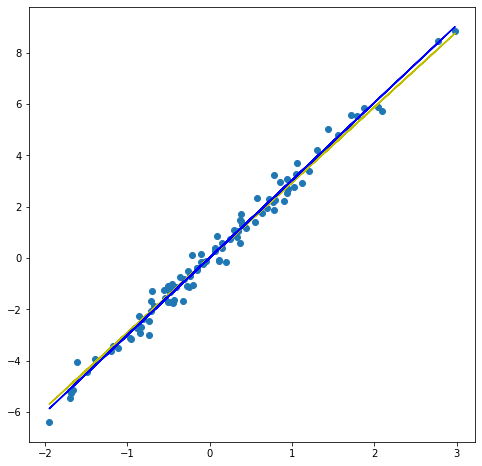

In [19]:
# Showing the predictions.
plt.figure(figsize = (8,8))
plt.plot(X,y,'o',X,y_pred,'y', X,y_pred3,'b')

The model performs comparible to the Keras ones, indicating our DenseANN class is doing something similar. On average, the mse loss is lower in the DenseANN class than on Keras too!

## Conclusion

To recap - we decided that the DenseANN class may be very useful since we can iterate over nodes within a layer for custom weights, as well as other factors that Keras does to the back-propagation that optimise the code, at the cost of the mse loss. I still think I will do testing on Keras networks despite the memory concerns with customising the first hidden layer, since in the example of 60x60 square pixel images the memory used should not be too high for my hardware. However, if scalability is a future issue, then the DenseANN class can help with this by reducing the memory needed to incorporate the custom initial weights into the network.